In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", None)

# Load the training dataset
train_data = pd.read_csv('soc-redditHyperlinks-body-test.tsv', delimiter='\t')

In [3]:
# Make Dataframe for describing 'PROPERTIES'
train_data_expl = pd.DataFrame(columns=[
    'Num_Characters', 'Num_Characters_No_Whitespace', 'Fraction_Alphabetical',
    'Fraction_Digits', 'Fraction_Uppercase', 'Fraction_Whitespace',
    'Fraction_Special_Characters', 'Num_Words', 'Num_Unique_Words',
    'Num_Long_Words', 'Avg_Word_Length', 'Num_Unique_Stopwords',
    'Fraction_Stopwords', 'Num_Sentences', 'Num_Long_Sentences',
    'Avg_Characters_Per_Sentence', 'Avg_Words_Per_Sentence',
    'Automated_Readability_Index', 'Positive_Sentiment_VADER',
    'Negative_Sentiment_VADER', 'Compound_Sentiment_VADER',
    'LIWC_Funct', 'LIWC_Pronoun', 'LIWC_Ppron', 'LIWC_I', 'LIWC_We',
    'LIWC_You', 'LIWC_SheHe', 'LIWC_They', 'LIWC_Ipron', 'LIWC_Article',
    'LIWC_Verbs', 'LIWC_AuxVb', 'LIWC_Past', 'LIWC_Present', 'LIWC_Future',
    'LIWC_Adverbs', 'LIWC_Prep', 'LIWC_Conj', 'LIWC_Negate', 'LIWC_Quant',
    'LIWC_Numbers', 'LIWC_Swear', 'LIWC_Social', 'LIWC_Family', 'LIWC_Friends',
    'LIWC_Humans', 'LIWC_Affect', 'LIWC_Posemo', 'LIWC_Negemo', 'LIWC_Anx',
    'LIWC_Anger', 'LIWC_Sad', 'LIWC_CogMech', 'LIWC_Insight', 'LIWC_Cause',
    'LIWC_Discrep', 'LIWC_Tentat', 'LIWC_Certain', 'LIWC_Inhib', 'LIWC_Incl',
    'LIWC_Excl', 'LIWC_Percept', 'LIWC_See', 'LIWC_Hear', 'LIWC_Feel',
    'LIWC_Bio', 'LIWC_Body', 'LIWC_Health', 'LIWC_Sexual', 'LIWC_Ingest',
    'LIWC_Relativ', 'LIWC_Motion', 'LIWC_Space', 'LIWC_Time', 'LIWC_Work',
    'LIWC_Achiev', 'LIWC_Leisure', 'LIWC_Home', 'LIWC_Money', 'LIWC_Relig',
    'LIWC_Death', 'LIWC_Assent', 'LIWC_Dissent', 'LIWC_Nonflu', 'LIWC_Filler'
])

# Iterate through each row to map the list elements to respective columns
for index, row in train_data.iterrows():
    properties_str = row['PROPERTIES']
    properties_list = [float(value) for value in properties_str.split(',')]  # Split and convert to float
    train_data_expl.loc[index] = properties_list

In [16]:
train_data.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,gaming4gamers,fallout,1u5q84s,2014-01-01 06:55:04,1,"102.0,102.0,0.803921568627,0.0294117647059,0.0..."
1,kpop,dota2,1u5qg2s,2014-01-01 07:05:10,1,"1050.0,938.0,0.705714285714,0.0419047619048,0...."
2,airsoft,airsoftmarket,1u5r7js,2014-01-01 07:09:16,1,"3788.0,3206.0,0.737856388596,0.0145195353749,0..."
3,circlebroke,childfree,1u5rs9s,2014-01-01 06:51:30,1,"1007.0,871.0,0.781529294935,0.00794438927507,0..."
4,tribes,games,1u5syks,2014-01-01 09:06:30,1,"1316.0,1108.0,0.788753799392,0.00303951367781,..."


In [4]:
# Describe the new DataFrame 'train_data_expl'
property_descriptions = train_data_expl.describe()

# Save property descriptions to a CSV file in the same folder
property_descriptions.to_csv('property_descriptions.csv')
property_descriptions.transpose().to_csv('property_descriptions_trans.csv')

In [5]:
property_descriptions.transpose()

,count,mean,std,min,25%,50%,75%,max
Num_Characters,4999.0,1415.330666,2034.291242,61.000000,276.500000,642.000000,1690.000000,17180.000000
Num_Characters_No_Whitespace,4999.0,1234.614323,1770.392775,61.000000,251.000000,556.000000,1491.500000,14320.000000
Fraction_Alphabetical,4999.0,0.756355,0.034458,0.431818,0.744238,0.762943,0.777452,0.849398
Fraction_Digits,4999.0,0.017658,0.017788,0.000103,0.006086,0.012642,0.022545,0.280488
Fraction_Uppercase,4999.0,0.039870,0.025852,0.002239,0.025597,0.034444,0.046584,0.434066
Fraction_Whitespace,4999.0,0.120990,0.049617,0.004950,0.089901,0.132841,0.159028,0.382986
Fraction_Special_Characters,4999.0,0.104997,0.050573,0.019799,0.064396,0.092760,0.142857,0.342275
Num_Words,4999.0,224.301860,326.258417,9.000000,41.000000,103.000000,251.500000,2975.000000
Num_Unique_Words,4999.0,124.400880,134.709707,9.000000,36.000000,78.000000,157.000000,1026.000000
Num_Long_Words,4999.0,46.770754,70.629929,2.000000,8.000000,20.000000,55.000000,609.000000



Distribution of posts per source subreddit:
SOURCE_SUBREDDIT
dailydot                 140
hailcorporate            100
circlebroke               94
france                    83
askreddit                 81
circlejerkcopypasta       74
badhistory                73
dogecoin                  70
subredditdrama            64
iama                      39
buildapc                  35
karmacourt                34
writingprompts            31
openbroke                 29
soccer                    28
explainlikeimfive         28
writing                   26
dogecoinbeg               25
atletico                  25
outoftheloop              24
shitredditsays            24
askhistorians             24
conspiracy                22
dogemarket                21
bitcoin                   21
askscience                20
legaladvice               18
help                      17
csshelp                   17
stalkerwatch              16
dadjokes                  15
casualiama                15
mlplounge 

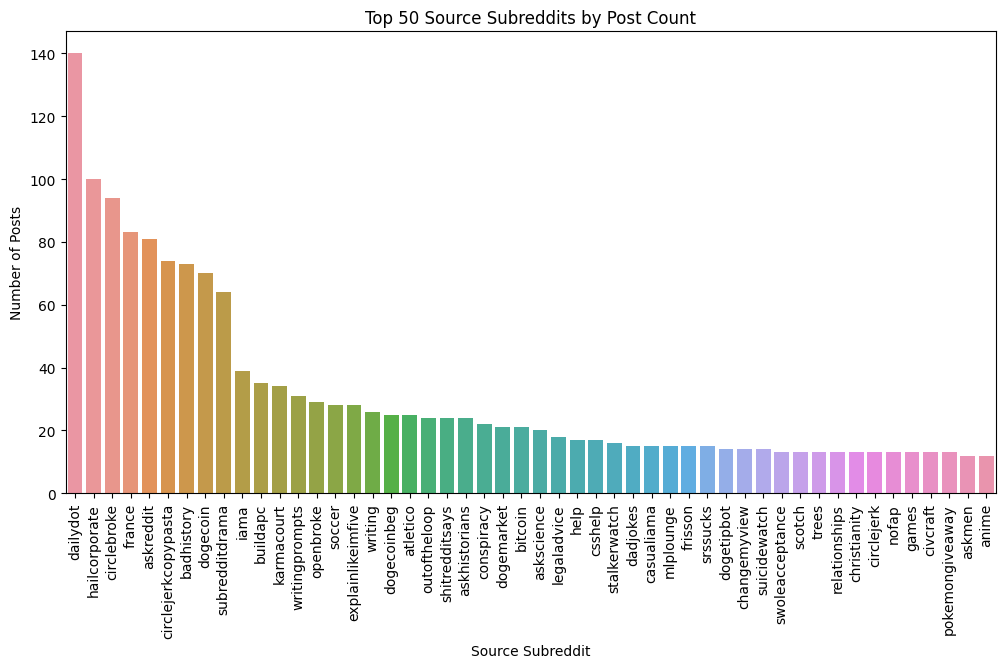

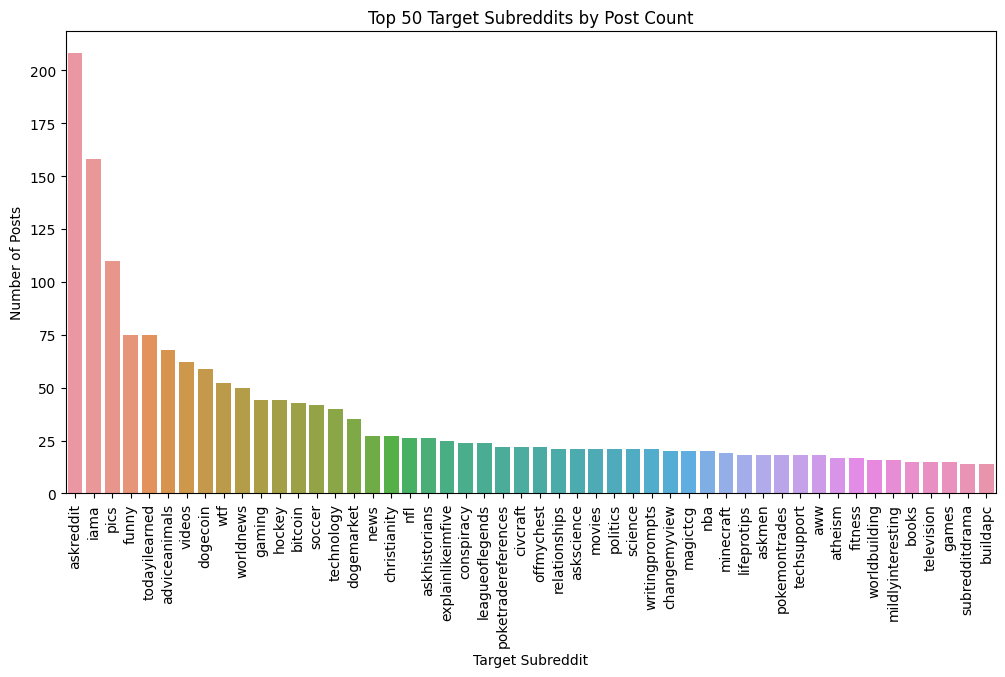

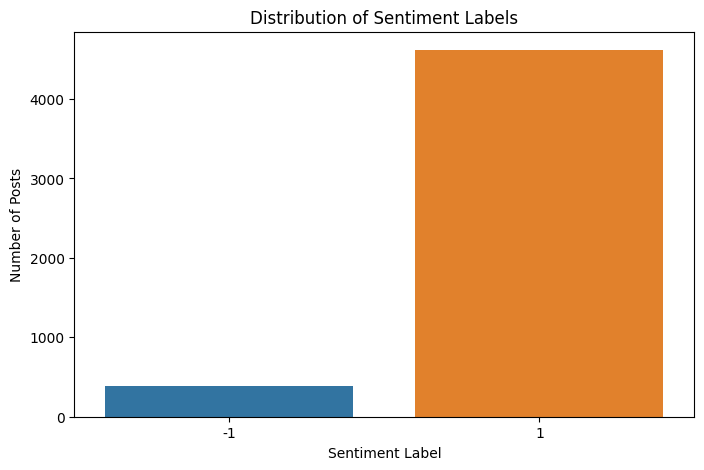

In [6]:
# Analyze the distribution of posts per source subreddit
source_subreddit_counts = train_data['SOURCE_SUBREDDIT'].value_counts()
print("\nDistribution of posts per source subreddit:")
print(source_subreddit_counts)

# Analyze the distribution of posts per target subreddit
target_subreddit_counts = train_data['TARGET_SUBREDDIT'].value_counts()
print("\nDistribution of posts per target subreddit:")
print(target_subreddit_counts)


headsize = 50
# Visualize the distribution of posts per source subreddit
plt.figure(figsize=(12, 6))
sns.barplot(x=source_subreddit_counts.head(headsize).index, y=source_subreddit_counts.head(headsize).values)
plt.xticks(rotation=90)
plt.xlabel('Source Subreddit')
plt.ylabel('Number of Posts')
plt.title(f'Top {headsize} Source Subreddits by Post Count')
plt.show()

# Visualize the distribution of posts per target subreddit
plt.figure(figsize=(12, 6))
sns.barplot(x=target_subreddit_counts.head(headsize).index, y=target_subreddit_counts.head(headsize).values)
plt.xticks(rotation=90)
plt.xlabel('Target Subreddit')
plt.ylabel('Number of Posts')
plt.title(f'Top {headsize} Target Subreddits by Post Count')
plt.show()

# Visualize the distribution of sentiment labels
plt.figure(figsize=(8, 5))
sns.countplot(x='LINK_SENTIMENT', data=train_data)
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Posts')
plt.title('Distribution of Sentiment Labels')
plt.show()


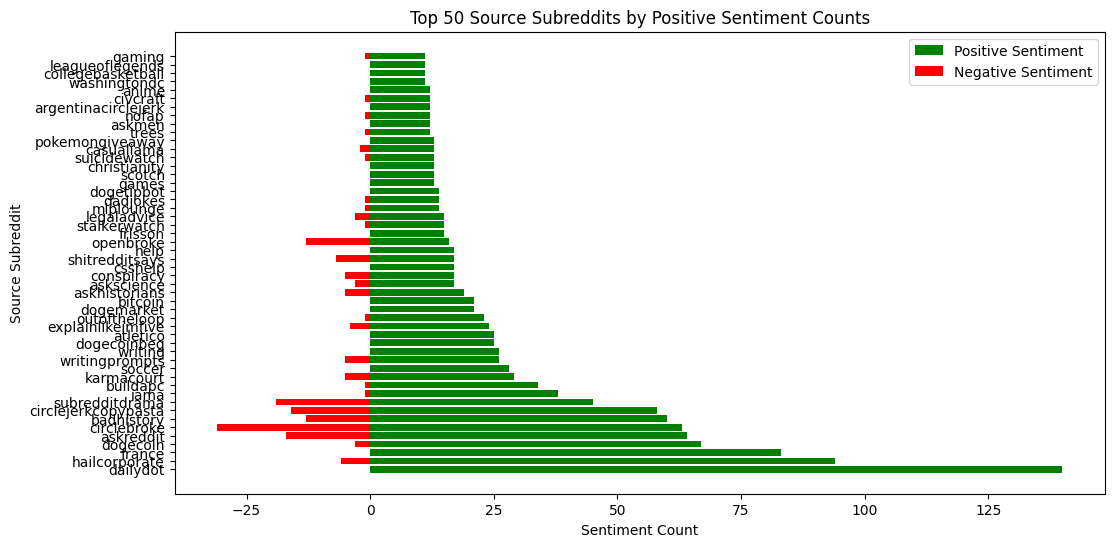

In [7]:
# Group by source subreddit and calculate the number of positive and negative sentiments
sentiment_counts = train_data.groupby(['SOURCE_SUBREDDIT', 'LINK_SENTIMENT']).size().unstack(fill_value=0)

# Sort source subreddits by the number of positive sentiments
sorted_source_subreddits = sentiment_counts[1].sort_values(ascending=False)
# Take the top `headsize` source subreddits with the most positive sentiments
top_source_subreddits = sorted_source_subreddits.head(headsize)
# Get the corresponding number of negative sentiments for the top source subreddits
negative_sentiments = sentiment_counts.loc[top_source_subreddits.index, -1]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))
# Plot the top source subreddits with positive and negative sentiments
ax.barh(top_source_subreddits.index, top_source_subreddits.values, color='green', label='Positive Sentiment')
ax.barh(top_source_subreddits.index, -negative_sentiments.values, color='red', label='Negative Sentiment')
# Set labels and title
ax.set_xlabel('Sentiment Count')
ax.set_ylabel('Source Subreddit')
ax.set_title(f'Top {headsize} Source Subreddits by Positive Sentiment Counts')

# Add a legend
ax.legend()
# Show the plot
plt.show()

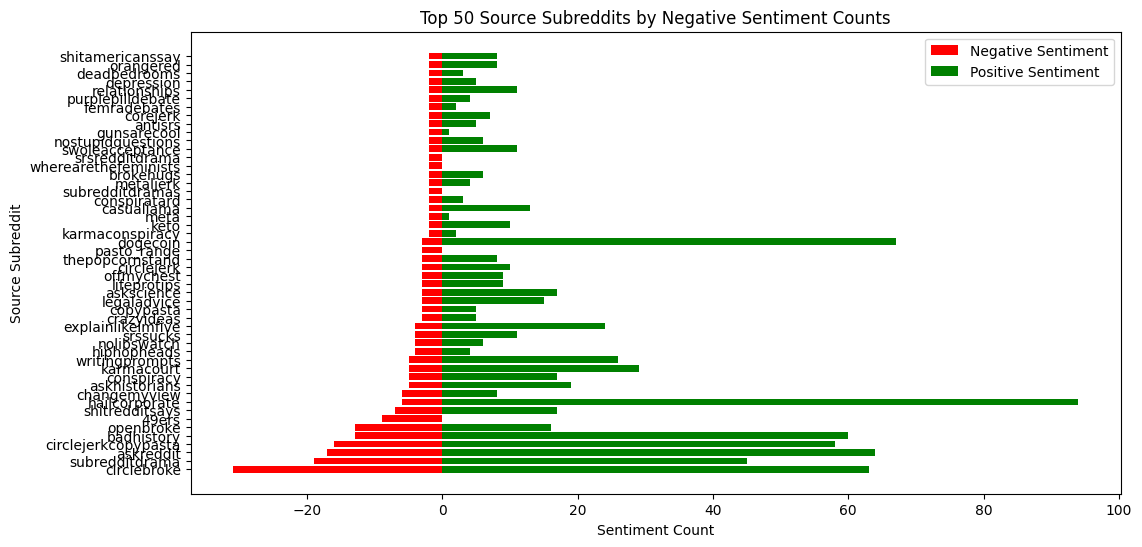

In [8]:

# Sort source subreddits by the number of negative sentiments
sorted_source_subreddits = sentiment_counts[-1].sort_values(ascending=False)
# Take the top `headsize` source subreddits with the most negative sentiments
top_source_subreddits = sorted_source_subreddits.head(headsize)
# Get the corresponding number of positive sentiments for the top source subreddits
positive_sentiments = sentiment_counts.loc[top_source_subreddits.index, 1]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))
# Plot the top source subreddits with negative and positive sentiments
ax.barh(top_source_subreddits.index, -top_source_subreddits.values, color='red', label='Negative Sentiment')
ax.barh(top_source_subreddits.index, positive_sentiments.values, color='green', label='Positive Sentiment')
# Set labels and title
ax.set_xlabel('Sentiment Count')
ax.set_ylabel('Source Subreddit')
ax.set_title(f'Top {headsize} Source Subreddits by Negative Sentiment Counts')

# Add a legend
ax.legend()

# Show the plot
plt.show()

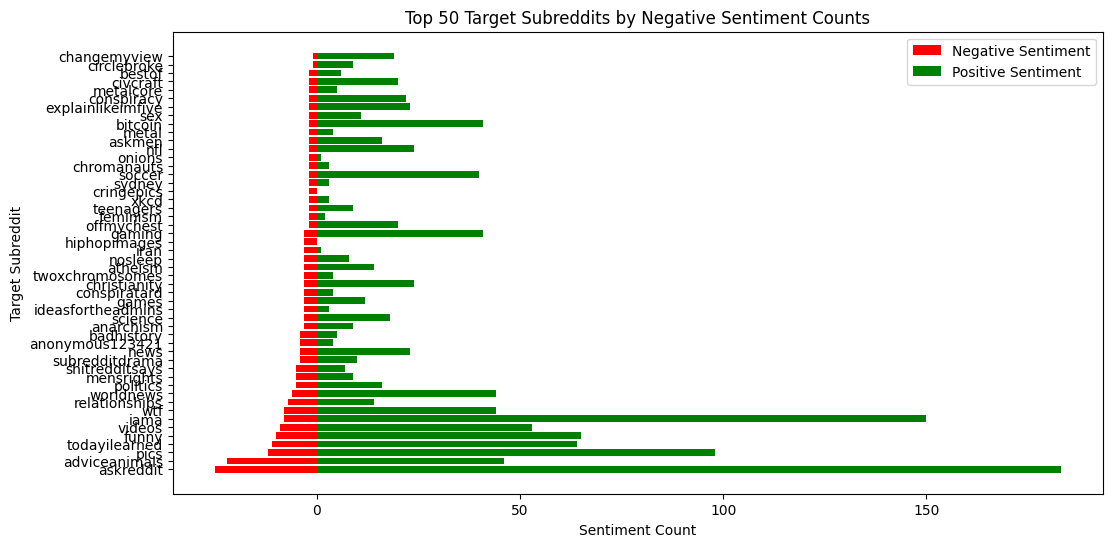

In [9]:
# Group by target subreddit and calculate the number of positive and negative sentiments
sentiment_counts = train_data.groupby(['TARGET_SUBREDDIT', 'LINK_SENTIMENT']).size().unstack(fill_value=0)

# Sort target subreddits by the number of negative sentiments
sorted_target_subreddits = sentiment_counts[-1].sort_values(ascending=False)
# Take the top `headsize` target subreddits with the most negative sentiments
top_target_subreddits = sorted_target_subreddits.head(headsize)
# Get the corresponding number of positive sentiments for the top target subreddits
positive_sentiments = sentiment_counts.loc[top_target_subreddits.index, 1]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))
# Plot the top target subreddits with negative and positive sentiments
ax.barh(top_target_subreddits.index, -top_target_subreddits.values, color='red', label='Negative Sentiment')
ax.barh(top_target_subreddits.index, positive_sentiments.values, color='green', label='Positive Sentiment')
# Set labels and title
ax.set_xlabel('Sentiment Count')
ax.set_ylabel('Target Subreddit')
ax.set_title(f'Top {headsize} Target Subreddits by Negative Sentiment Counts')
# Add a legend
ax.legend()
# Show the plot
plt.show()

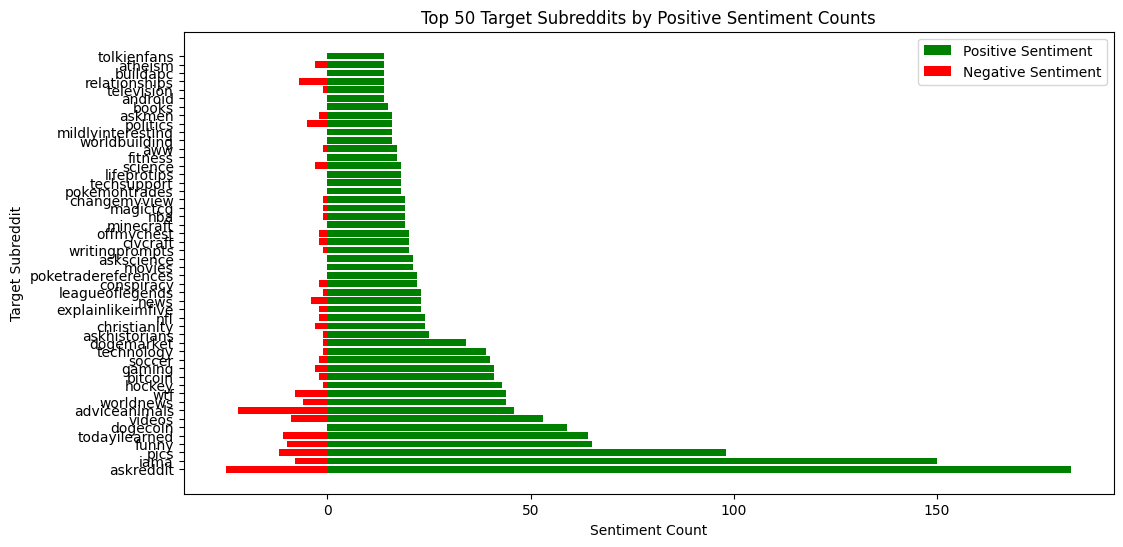

In [10]:

# Sort target subreddits by the number of positive sentiments
sorted_target_subreddits = sentiment_counts[1].sort_values(ascending=False)
# Take the top `headsize` target subreddits with the most positive sentiments
top_target_subreddits = sorted_target_subreddits.head(headsize)
# Get the corresponding number of negative sentiments for the top target subreddits
negative_sentiments = sentiment_counts.loc[top_target_subreddits.index, -1]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))
# Plot the top target subreddits with positive and negative sentiments
ax.barh(top_target_subreddits.index, top_target_subreddits.values, color='green', label='Positive Sentiment')
ax.barh(top_target_subreddits.index, -negative_sentiments.values, color='red', label='Negative Sentiment')
# Set labels and title
ax.set_xlabel('Sentiment Count')
ax.set_ylabel('Target Subreddit')
ax.set_title(f'Top {headsize} Target Subreddits by Positive Sentiment Counts')
# Add a legend
ax.legend()
# Show the plot
plt.show()

In [11]:
# Group by source subreddit and calculate statistics
subreddit_stats_src = train_data.groupby('SOURCE_SUBREDDIT').agg({
    'LINK_SENTIMENT': 'count'  # Count of total posts
})

# Rename the column for clarity
subreddit_stats_src.columns = ['Total_Posts']

# Calculate the ratio of total posts to positive sentiment (1)
subreddit_stats_src['Posts_to_Positive_Ratio'] = subreddit_stats_src['Total_Posts'] / train_data[train_data['LINK_SENTIMENT'] == 1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count()

# Calculate the ratio of total posts to negative sentiment (-1)
subreddit_stats_src['Posts_to_Negative_Ratio'] = subreddit_stats_src['Total_Posts'] / train_data[train_data['LINK_SENTIMENT'] == -1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count()

subreddit_stats_src['Positive_to_Negative_Ratio'] = train_data[train_data['LINK_SENTIMENT'] == 1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count() / train_data[train_data['LINK_SENTIMENT'] == -1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count()
subreddit_stats_src['pos'] = train_data[train_data['LINK_SENTIMENT'] == 1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count()
subreddit_stats_src['neg'] = train_data[train_data['LINK_SENTIMENT'] == -1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count()

subreddit_stats_src.fillna(0, inplace=True)
# Display the resulting statistics for each subreddit
subreddit_stats_src.sample(n=15)


,Total_Posts,Posts_to_Positive_Ratio,Posts_to_Negative_Ratio,Positive_to_Negative_Ratio,pos,neg
SOURCE_SUBREDDIT,,,,,,
wwe,1,1.000000,0.0,0.0,1.0,0.0
optometry,1,1.000000,0.0,0.0,1.0,0.0
dirtypenpals,2,2.000000,2.0,1.0,1.0,1.0
rockets,1,1.000000,0.0,0.0,1.0,0.0
atheism,11,1.100000,11.0,10.0,10.0,1.0
scottishproblems,1,1.000000,0.0,0.0,1.0,0.0
cryptography,1,1.000000,0.0,0.0,1.0,0.0
askhistory,1,1.000000,0.0,0.0,1.0,0.0
augmentedreality,1,1.000000,0.0,0.0,1.0,0.0


In [12]:
# Group by target subreddit and calculate statistics
subreddit_stats_target = train_data.groupby('TARGET_SUBREDDIT').agg({
    'LINK_SENTIMENT': 'count'  # Count of total posts
})

# Rename the column for clarity
subreddit_stats_target.columns = ['Total_Posts']

# Calculate the ratio of total posts to positive sentiment (1)
subreddit_stats_target['Posts_to_Positive_Ratio'] = subreddit_stats_target['Total_Posts'] / train_data[train_data['LINK_SENTIMENT'] == 1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count()

# Calculate the ratio of total posts to negative sentiment (-1)
subreddit_stats_target['Posts_to_Negative_Ratio'] = subreddit_stats_target['Total_Posts'] / train_data[train_data['LINK_SENTIMENT'] == -1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count()

subreddit_stats_target['Positive_to_Negative_Ratio'] = train_data[train_data['LINK_SENTIMENT'] == 1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count() / train_data[train_data['LINK_SENTIMENT'] == -1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count()
subreddit_stats_target['pos'] = train_data[train_data['LINK_SENTIMENT'] == 1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count()
subreddit_stats_target['neg'] = train_data[train_data['LINK_SENTIMENT'] == -1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count()

subreddit_stats_target.fillna(0, inplace=True)
# Display the resulting statistics for each subreddit
subreddit_stats_target.sample(n=15)

,Total_Posts,Posts_to_Positive_Ratio,Posts_to_Negative_Ratio,Positive_to_Negative_Ratio,pos,neg
TARGET_SUBREDDIT,,,,,,
coinflow,6,3.000000,0.0,0.0,2.0,0.0
linux,2,0.666667,0.0,0.0,3.0,0.0
ffxiv,2,0.000000,0.0,0.0,0.0,0.0
starcitizen_trades,1,0.333333,0.0,0.0,3.0,0.0
bitmarket,3,0.000000,0.0,0.0,0.0,0.0
mindcrackcirclejerk,1,0.000000,0.0,0.0,0.0,0.0
itmejp,1,1.000000,0.0,0.0,1.0,0.0
loseit,2,0.400000,2.0,5.0,5.0,1.0
casualiama,8,0.615385,4.0,6.5,13.0,2.0


In [13]:
negative_subs_src = subreddit_stats_src[subreddit_stats_src['Positive_to_Negative_Ratio'] < 1 & (subreddit_stats_src['pos'] != 0) & (subreddit_stats_src['neg'] != 0)]
print(negative_subs_src.shape[0])
negative_subs_src.sample(frac=0.5)

3


,Total_Posts,Posts_to_Positive_Ratio,Posts_to_Negative_Ratio,Positive_to_Negative_Ratio,pos,neg
SOURCE_SUBREDDIT,,,,,,
meta,3,3.0,1.5,0.5,1.0,2.0
shitstatistssay,3,3.0,1.5,0.5,1.0,2.0


In [14]:
negative_subs_target = subreddit_stats_target[subreddit_stats_target['Positive_to_Negative_Ratio'] < 1 & (subreddit_stats_target['pos'] != 0) & (subreddit_stats_target['neg'] != 0)]
print(negative_subs_target.shape[0])
negative_subs_target.sample(frac=0.5)

2


,Total_Posts,Posts_to_Positive_Ratio,Posts_to_Negative_Ratio,Positive_to_Negative_Ratio,pos,neg
TARGET_SUBREDDIT,,,,,,
shitstatistssay,2,2.0,1.0,0.5,1.0,2.0
